In [1]:
import numpy as np
import matplotlib
from matplotlib import style
style.use('ggplot')
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.io_utils import read_json, write_json

/Users/pickering/miniconda3/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
calc_input = read_json("wfirst_imager.json")

calc_input['scene'][0]['spectrum']['normalization']['norm_flux'] = 0.01
calc_input['scene'][0]['spectrum']['normalization']['norm_wave'] = 2.0
calc_input['background'] = 'low'

calc_input['scene'][0]['shape']['geometry'] = 'sersic'
calc_input['scene'][0]['shape']['sersic_index'] = 1.0
calc_input['scene'][0]['shape']['major'] = 0.5
calc_input['scene'][0]['shape']['minor'] = 0.2
calc_input['scene'][0]['position']['orientation'] = 60.0
report = perform_calculation(calc_input, dict_report=False, webapp=True)
report_dict = report.as_dict()
report_fits = report.as_fits()
for w, msg in report_dict['warnings'].items():
    print(w + ": " + msg)
print(report_dict['scalar'])

{'flux': 3.632867375799415, 'sn': 58.81335960270051, 'total_flux': 50.29031127742711, 'on_source_time': 1934.66, 'reference_wavelength': 0.8580317723105501}


<IPython.core.display.Javascript object>


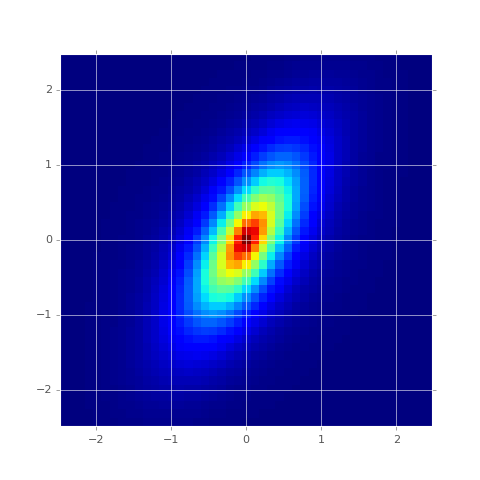

In [3]:
plt.figure(figsize=(6, 6))
t = report_dict['transform']
if report_dict['information']['calc_type'] == 'image':
    xmin = t['x_min'] 
    xmax = t['x_max']
    aspect = 1.0
else:
    xmin = t['wave_min']
    xmax = t['wave_max']
    aspect = 0.75
# 
ymin = t['y_min']
ymax = t['y_max']
extent = [xmin, xmax, ymin, ymax]
implot = plt.imshow(
    report_dict['2d']['snr'],
    interpolation='nearest',
    extent=extent,
    aspect=aspect*(xmax-xmin)/(ymax-ymin)
)
plt.show()